In [1]:
import matplotlib
import matplotlib.pyplot as plt

from data import GunshotForensicDataset

In [2]:
dataSet = GunshotForensicDataset(root="./",seq_duration=5.0)

In [3]:
audio, target = dataSet[1900]

NameError: name 'torhc' is not defined

In [31]:
data, rate = audio

In [32]:
data

tensor([[0.0031, 0.0040, 0.0050,  ..., 0.0231, 0.0216, 0.0216],
        [0.0031, 0.0040, 0.0050,  ..., 0.0231, 0.0216, 0.0216]])

In [33]:
rate

48000

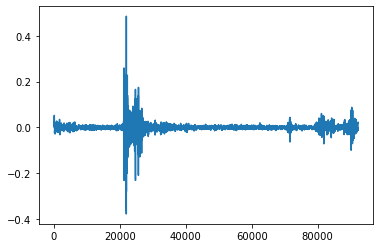

In [34]:
data_np = data.numpy()[0]
plt.plot(data_np, '-', )

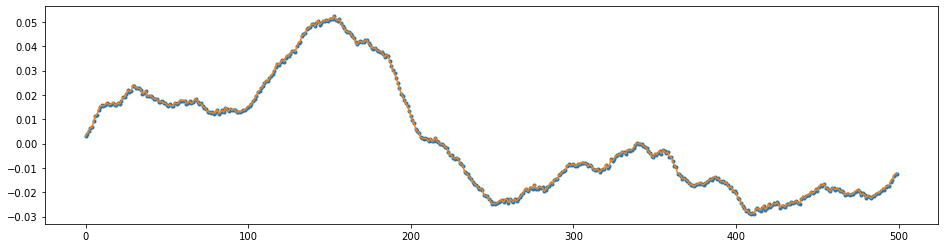

In [36]:
plt.figure(figsize=(16,4))
plt.plot(data_np[:500], '.')
plt.plot(data_np[:500], '-')

In [2]:
import torch
import torch.nn as nn
model = torch.hub.load('pytorch/vision:v0.9.0', 'resnet18', pretrained=True)

Using cache found in /home/tommy/.cache/torch/hub/pytorch_vision_v0.9.0


In [3]:

model.conv1 = nn.Conv2d(1, model.conv1.out_channels, kernel_size= model.conv1.kernel_size[0], stride=model.conv1.stride[0], padding=model.conv1.padding[0])

In [ ]:
num_ftrs = model.fc.in_features
model.fc = nn.Linear(num_ftrs, 8)